📌** PROJECT STATEMENT**

Title: **Real Estate Investment Decision System**

**Objective:**
### Develop a machine learning application to help potential investors make real estate decisions.
The system will:

-Classify whether a property is a “Good Investment”
(Classification)

-Predict the estimated price of the property after 5
years (Regression)

The system should use the provided dataset (india_housing_prices.csv) and include steps for preprocessing, analysis, feature engineering, model training, evaluation, MLflow experiment tracking, and deployment through a Streamlit web app for end-user interaction.

# **Business Use Cases:**

Empower real estate investors with intelligent tools
to assess long-term returns

Support buyers in choosing high-return properties in developing areas

Help real estate companies automate investment analysis for listings

Improve customer trust in real estate platforms with data-driven predictions

## STEP 1 — Data Loading & Initial Exploration
The first step is to load and inspect the dataset to understand its structure, data types, and quality. This step helps discover missing values, incorrect data types, and feature distribution before cleaning and modeling.

In [3]:
import pandas as pd

# Load the data
df = pd.read_csv("/content/india_housing_prices.csv")

# Display shape
print("Shape of dataset:", df.shape)

# Columns & info
print("\nInfo:\n", df.info())

# Summary statistics
print("\nDescribe:\n", df.describe())

# Check missing values
print("\nMissing values:\n", df.isnull().sum())



Shape of dataset: (1200, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              1200 non-null   int64  
 1   State                           1200 non-null   object 
 2   City                            1200 non-null   object 
 3   Locality                        1200 non-null   object 
 4   Property_Type                   1200 non-null   object 
 5   BHK                             1200 non-null   int64  
 6   Size_in_SqFt                    1200 non-null   int64  
 7   Price_in_Lakhs                  1200 non-null   float64
 8   Price_per_SqFt                  1200 non-null   float64
 9   Year_Built                      1200 non-null   int64  
 10  Furnished_Status                1200 non-null   object 
 11  Floor_No                        1200 non-null   int64  
 12  Total

## STEP 2 — Data Preprocessing & Feature Engineering
This step involves cleaning the data, handling missing values, encoding categorical variables, and creating new meaningful features like Price_per_SqFt, Age_of_Property, and Amenities_Count to improve model performance.

In [11]:
import pandas as pd
import os

def load_data(path):
    return pd.read_csv("/content/india_housing_prices.csv")

def clean_data(df):
    df = df.copy()

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Fill numeric missing values
    num_cols = df.select_dtypes(include=['int', 'float']).columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())

    # Fill categorical missing values
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df

def feature_engineering(df):
    df["Age_of_Property"] = 2025 - df["Year_Built"]
    df["Price_per_SqFt"] = (df["Price_in_Lakhs"] * 100000) / df["Size_in_SqFt"]
    return df

def create_labels(df):
    city_median = df.groupby("City")["Price_per_SqFt"].transform("median")
    df["Good_Investment"] = (df["Price_per_SqFt"] <= city_median).astype(int)

    df["Future_Price_5Y"] = df["Price_in_Lakhs"] * ((1 + 0.08) ** 5)
    return df

def preprocess_pipeline(input_csv, output_csv="processed_data.csv"):

    # ✔ Ensure directory exists (if saving inside a folder)
    os.makedirs(os.path.dirname(output_csv), exist_ok=True) \
        if "/" in output_csv else None

    df = load_data(input_csv)
    df = clean_data(df)
    df = feature_engineering(df)
    df = create_labels(df)

    df.to_csv(output_csv, index=False)
    print(f"Preprocessed data saved at: {output_csv}")

if __name__ == "__main__":
    preprocess_pipeline("india_housing_prices.csv")



Preprocessed data saved at: processed_data.csv


### STEP 3 — EDA (Exploratory Data Analysis)

Exploratory analysis helps understand feature distributions and relationships. Visualization provides insights like price distribution by city, BHK distribution, correlation heatmap, and how amenities affect price.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/india_housing_prices.csv")
df.head()


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Telangana,Hyderabad,Locality C,Independent House,3,1360,118.02,8678.15,2008,...,17,5,7,2,2,NaN,Clubhouse,South,Individual,Under Construction
1,2,Telangana,Hyderabad,Locality A,Apartment,2,3985,202.87,5090.95,2011,...,14,5,1,4,0,Guard,Pool,South,Agent,Under Construction
2,3,Delhi,New Delhi,Locality A,Independent House,4,2399,181.23,7554.49,1996,...,29,3,5,3,0,CCTV,Pool,North,Builder,Ready to Move
3,4,Karnataka,Mysore,Locality B,Villa,4,2639,124.88,4732.23,2006,...,19,8,3,2,1,CCTV,Gym,East,Builder,Under Construction
4,5,Telangana,Hyderabad,Locality B,Independent House,2,661,61.93,9368.96,2010,...,15,8,7,4,0,Gated,Clubhouse,North,Individual,Ready to Move



3.1 Check basic information

In [13]:
print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Data Types:")
print(df.dtypes)

print("\n🔹 First 5 Rows:")
display(df.head())

print("\n🔹 Missing Values:")
print(df.isnull().sum())


🔹 Dataset Shape: (1200, 23)

🔹 Data Types:
ID                                  int64
State                              object
City                               object
Locality                           object
Property_Type                      object
BHK                                 int64
Size_in_SqFt                        int64
Price_in_Lakhs                    float64
Price_per_SqFt                    float64
Year_Built                          int64
Furnished_Status                   object
Floor_No                            int64
Total_Floors                        int64
Age_of_Property                     int64
Nearby_Schools                      int64
Nearby_Hospitals                    int64
Public_Transport_Accessibility      int64
Parking_Space                       int64
Security                           object
Amenities                          object
Facing                             object
Owner_Type                         object
Availability_Status              

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Telangana,Hyderabad,Locality C,Independent House,3,1360,118.02,8678.15,2008,...,17,5,7,2,2,NaN,Clubhouse,South,Individual,Under Construction
1,2,Telangana,Hyderabad,Locality A,Apartment,2,3985,202.87,5090.95,2011,...,14,5,1,4,0,Guard,Pool,South,Agent,Under Construction
2,3,Delhi,New Delhi,Locality A,Independent House,4,2399,181.23,7554.49,1996,...,29,3,5,3,0,CCTV,Pool,North,Builder,Ready to Move
3,4,Karnataka,Mysore,Locality B,Villa,4,2639,124.88,4732.23,2006,...,19,8,3,2,1,CCTV,Gym,East,Builder,Under Construction
4,5,Telangana,Hyderabad,Locality B,Independent House,2,661,61.93,9368.96,2010,...,15,8,7,4,0,Gated,Clubhouse,North,Individual,Ready to Move



🔹 Missing Values:
ID                                  0
State                               0
City                                0
Locality                            0
Property_Type                       0
BHK                                 0
Size_in_SqFt                        0
Price_in_Lakhs                      0
Price_per_SqFt                      0
Year_Built                          0
Furnished_Status                    0
Floor_No                            0
Total_Floors                        0
Age_of_Property                     0
Nearby_Schools                      0
Nearby_Hospitals                    0
Public_Transport_Accessibility      0
Parking_Space                       0
Security                          314
Amenities                         308
Facing                              0
Owner_Type                          0
Availability_Status                 0
dtype: int64


### 3.2 Statistical Summary

In [14]:
print("🔹 Statistical Summary:")
display(df.describe())


🔹 Statistical Summary:


,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,2.925833,2248.625833,156.541108,6995.307750,2006.429167,9.921667,14.700000,18.570833,4.966667,4.958333,2.468333,0.974167
std,346.554469,1.397722,1001.785654,81.127284,1749.846817,9.456894,5.523521,5.841527,9.456894,2.514125,2.627550,1.112068,0.829099
min,1.000000,1.000000,500.000000,25.050000,4001.860000,1990.000000,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000,0.000000
25%,300.750000,2.000000,1400.250000,91.040000,5499.732500,1999.000000,5.000000,10.000000,11.000000,3.000000,3.000000,1.000000,0.000000
50%,600.500000,3.000000,2221.000000,146.270000,7000.125000,2006.000000,10.000000,15.000000,19.000000,5.000000,5.000000,2.000000,1.000000
75%,900.250000,4.000000,3080.500000,212.055000,8576.932500,2014.000000,15.000000,20.000000,26.000000,7.000000,7.000000,3.000000,2.000000
max,1200.000000,5.000000,3999.000000,396.880000,9998.310000,2023.000000,19.000000,24.000000,35.000000,9.000000,9.000000,4.000000,2.000000


### 3.3 Plot distribution of important features

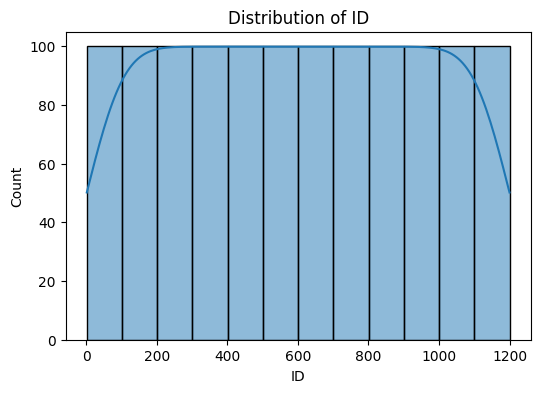

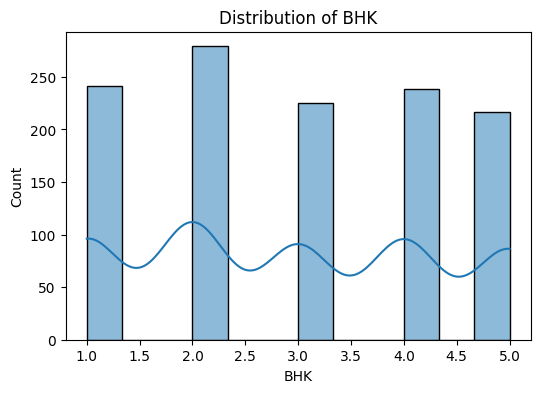

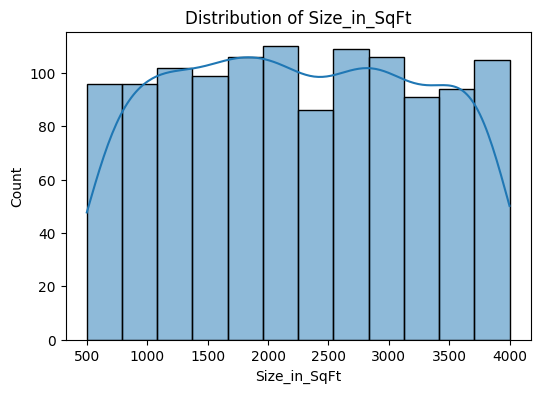

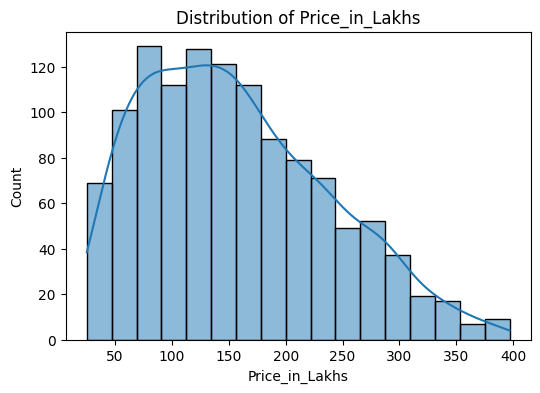

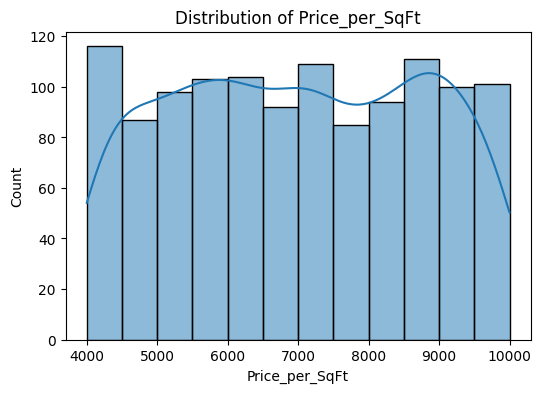

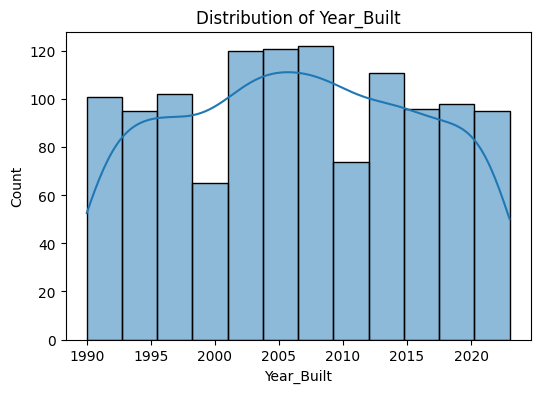

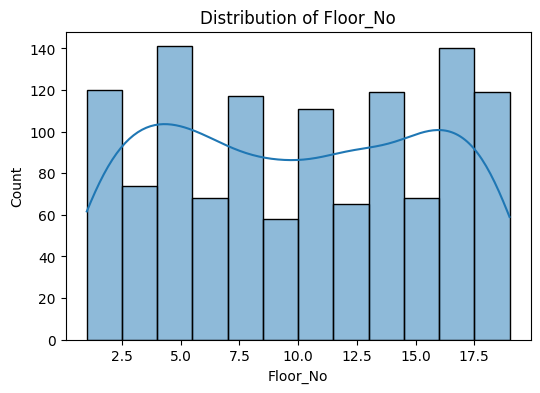

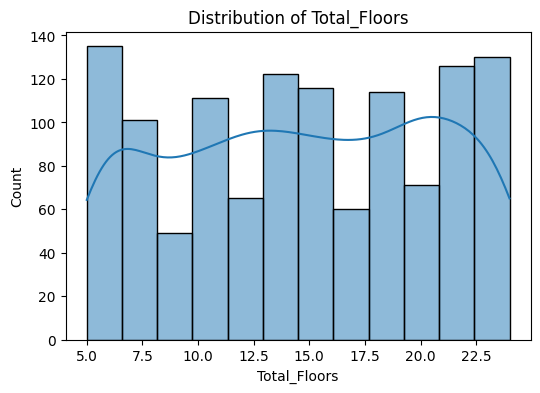

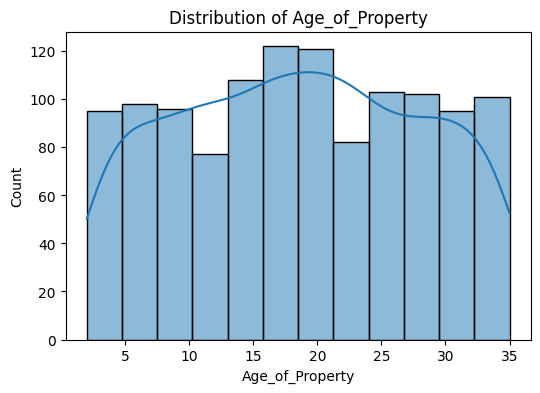

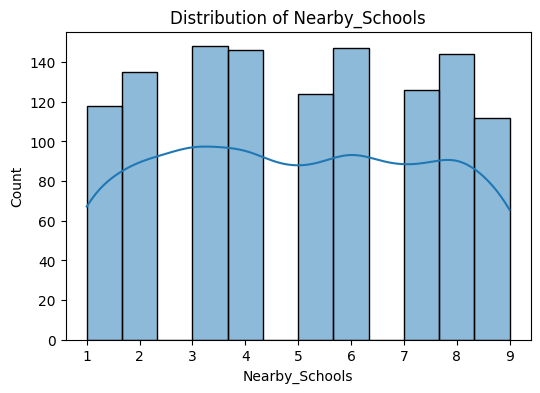

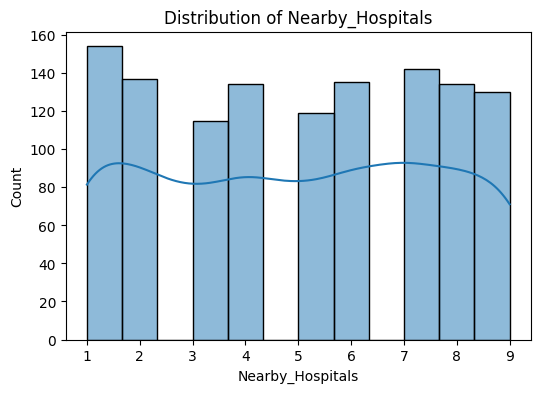

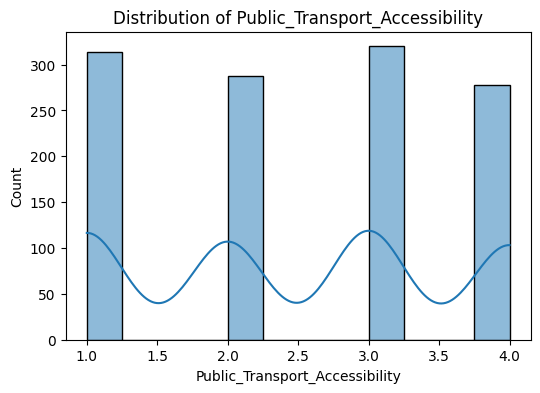

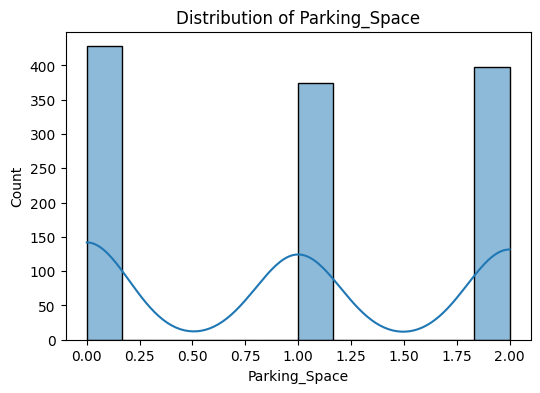

In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


### 3.4 Correction Heatmap

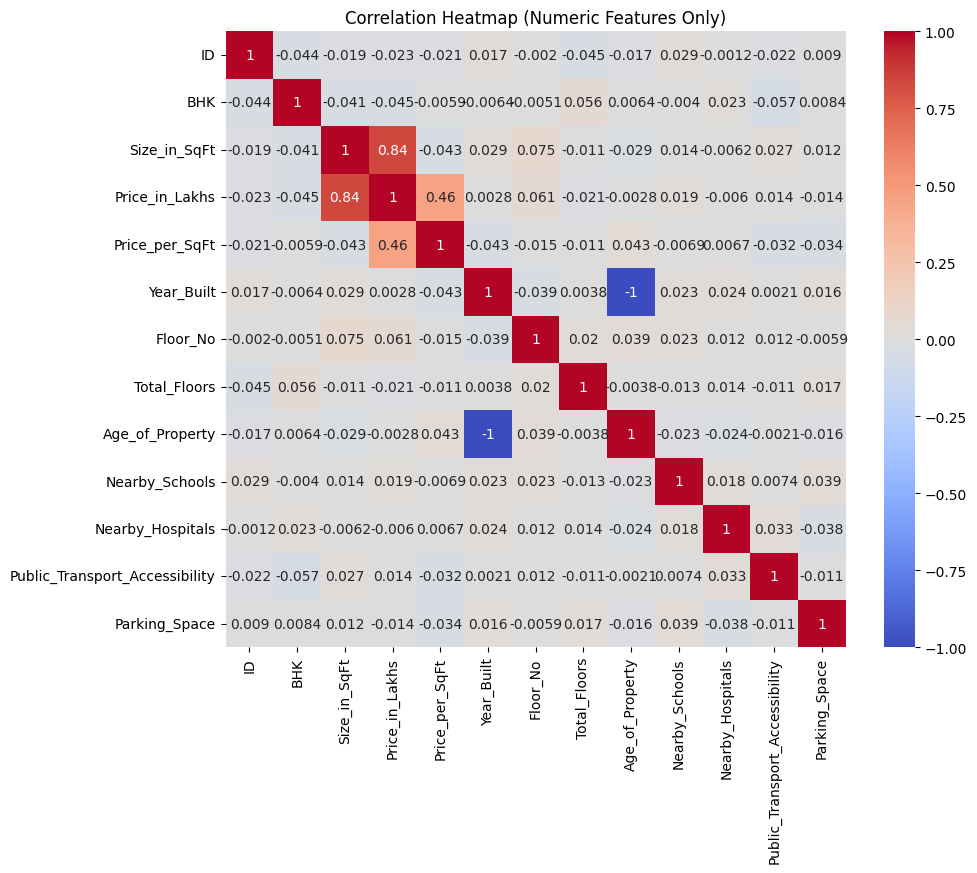

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()




### 3.6 Relationship between features & target

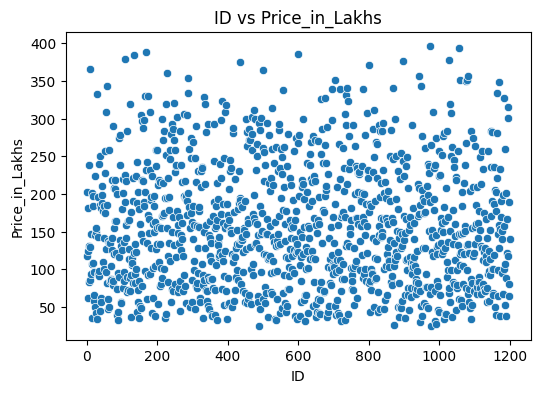

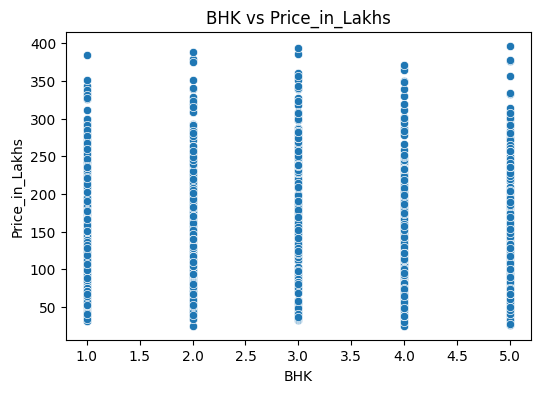

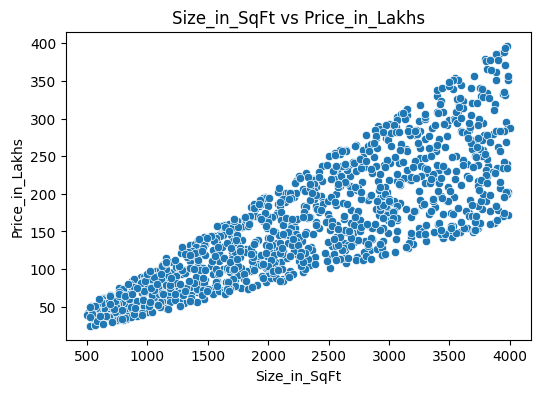

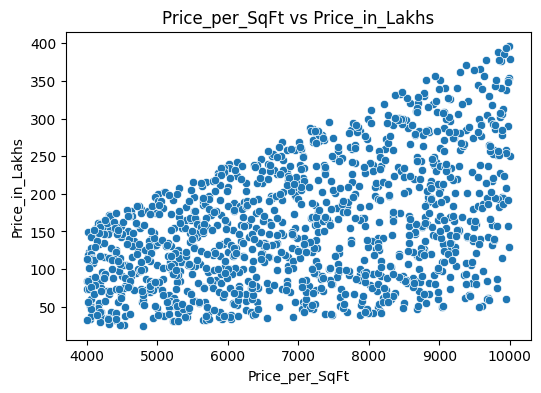

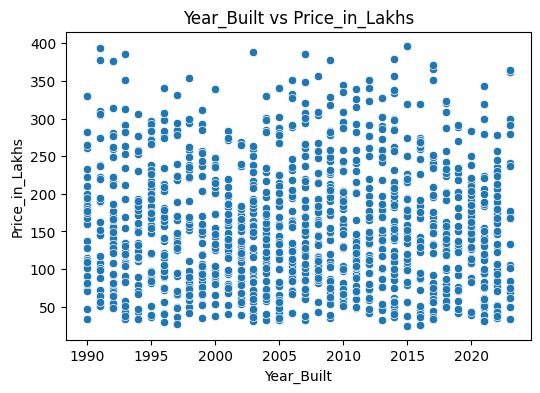

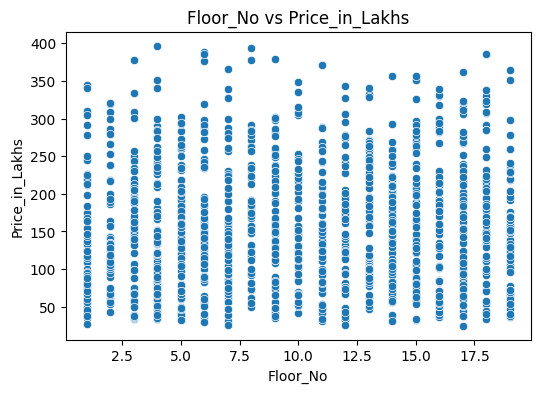

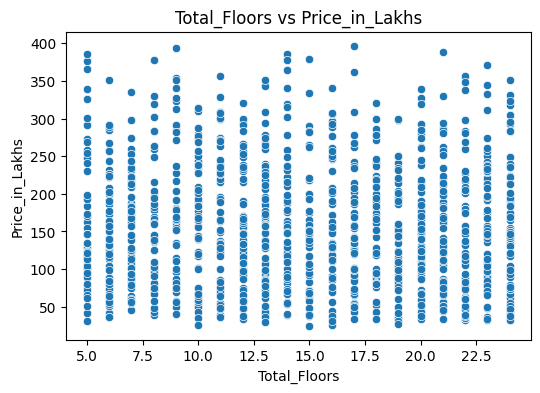

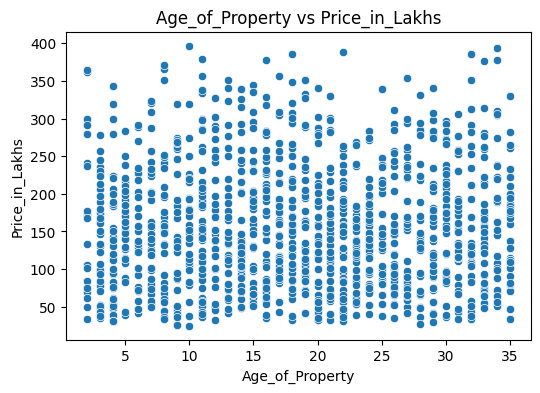

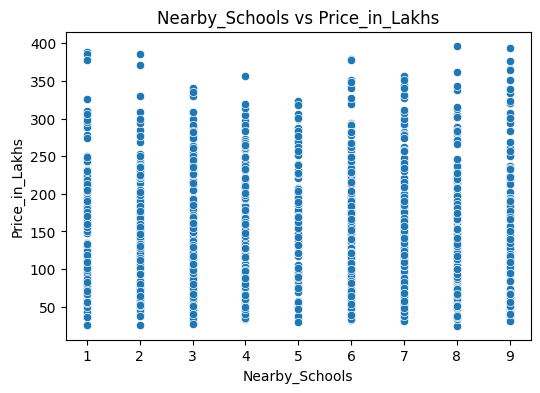

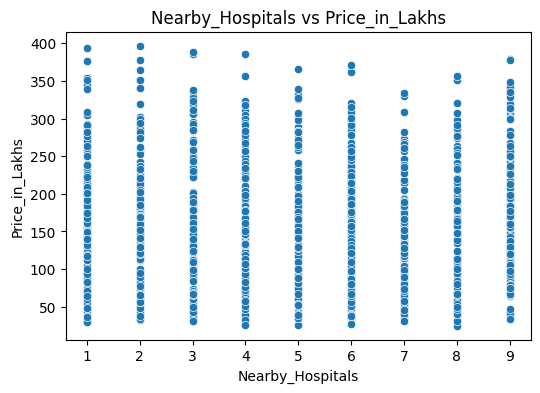

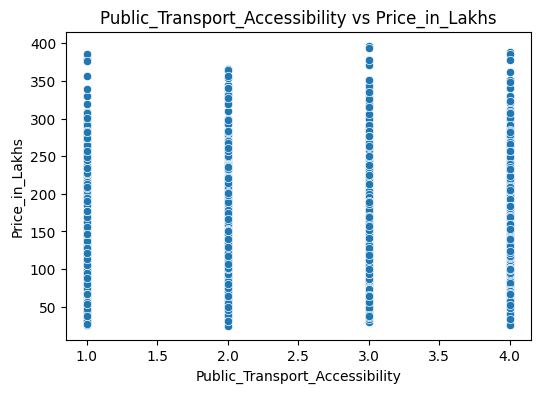

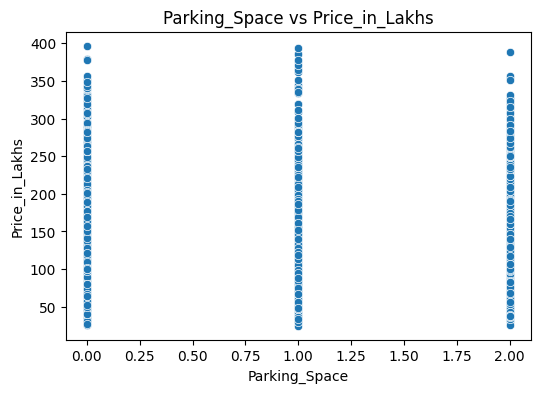

In [20]:
target = "Price_in_Lakhs"  # Correct column name

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
        plt.show()


### STEP 4 — Train Classification Model

### This step trains a model to classify whether a property is a “Good Investment”. We use RandomForest, log metrics with MLflow, and save the best model.


Step : 4.1

In [22]:
!pip install mlflow --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.2/764.2 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.2 MB/s eta 0:00:00


Step : 4.2

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, r2_score
import mlflow
import mlflow.sklearn
import os


Step 4.3 to 4.7

In [25]:
## ===============================
# STEP 4.3 - 4.7: Model Prep & Classification Training
# ===============================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import mlflow
import mlflow.sklearn
import os
import joblib

# -------------------------------
# 1️⃣ Load Processed Data
# -------------------------------
df = pd.read_csv("/content/processed_data.csv")  # path to preprocessed CSV

# Define target and drop unnecessary columns
target_class = "Good_Investment"
drop_cols = ["Good_Investment", "Future_Price_5Y", "ID", "Locality", "State", "City", "Owner_Type", "Availability_Status"]

X = df.drop(columns=drop_cols)
y_class = df[target_class]

# -------------------------------
# 2️⃣ Encode Categorical Columns
# -------------------------------
cat_cols = X.select_dtypes(include=['object']).columns
le_dict = {}  # To save encoders for deployment

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# -------------------------------
# 3️⃣ Scale Features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 4️⃣ Train-Test Split
# -------------------------------
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_scaled, y_class, test_size=0.2, random_state=42
)

# -------------------------------
# 5️⃣ Train Classification Model with MLflow Logging
# -------------------------------
mlflow.set_experiment("RealEstate_Investment")

with mlflow.start_run(run_name="RandomForest_Classifier"):

    clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
    clf.fit(X_train_class, y_train_class)

    # Predict on test set
    y_pred_class = clf.predict(X_test_class)

    # Evaluate
    acc = accuracy_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)
    roc = roc_auc_score(y_test_class, y_pred_class)

    # Log parameters & metrics
    mlflow.log_param("model", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("max_depth", 10)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc)

    # Log model
    mlflow.sklearn.log_model(clf, "model_classifier")

    print(f"✅ Classification Metrics: Accuracy={acc:.3f}, F1-Score={f1:.3f}, ROC-AUC={roc:.3f}")

# -------------------------------
# 6️⃣ Save Model, Scaler, and Encoders
# -------------------------------
os.makedirs("models", exist_ok=True)
joblib.dump(clf, "models/model_classifier.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(le_dict, "models/encoders.pkl")

print("✅ Classification model, scaler, and encoders saved in 'models/' folder!")



2025/12/12 16:20:26 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/12 16:20:26 INFO mlflow.store.db.utils: Updating database tables
2025/12/12 16:20:26 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/12 16:20:26 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/12 16:20:27 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2025/12/12 16:20:27 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2025/12/12 16:20:27 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2025/12/12 16:20:27 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2025/12/12 16:20:27 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2025/12/12 16:20:27 INFO alembic.runtime.migration: Running 

✅ Classification Metrics: Accuracy=0.946, F1-Score=0.948, ROC-AUC=0.946
✅ Classification model, scaler, and encoders saved in 'models/' folder!


### STEP 5 — Train Regression Model

Now we train a model to predict the future price (Future_Price_5Y). We evaluate performance using RMSE, MAE, and R² metrics and log everything with MLflow.

In [34]:
# -------------------------------
# IMPORT LIBRARIES
# -------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import mlflow.sklearn
import joblib
import os
import numpy as np

# -------------------------------
# 1️⃣ Load Preprocessed Data
# -------------------------------
df = pd.read_csv("data/processed_data.csv")  # Use your processed CSV

# Define target and features
target_reg = "Future_Price_5Y"
drop_cols = ["Good_Investment", "Future_Price_5Y", "ID", "Locality", "State", "City", "Owner_Type", "Availability_Status"]
X = df.drop(columns=drop_cols)
y_reg = df[target_reg]

# -------------------------------
# 2️⃣ Encode Categorical Columns
# -------------------------------
cat_cols = X.select_dtypes(include=['object']).columns
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# -------------------------------
# 3️⃣ Scale Features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 4️⃣ Train-Test Split
# -------------------------------
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_reg, test_size=0.2, random_state=42
)

# -------------------------------
# 5️⃣ Train RandomForest Regressor with MLflow Logging
# -------------------------------
mlflow.set_experiment("RealEstate_Investment")

with mlflow.start_run(run_name="RandomForest_Regressor"):
    reg = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
    reg.fit(X_train_reg, y_train_reg)

    # Predict and evaluate
    y_pred_reg = reg.predict(X_test_reg)

    # RMSE calculation compatible with older sklearn
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
    r2 = r2_score(y_test_reg, y_pred_reg)

    # Log parameters and metrics
    mlflow.log_param("model", "RandomForestRegressor")
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("max_depth", 10)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)

    # Log model
    mlflow.sklearn.log_model(reg, "model_regressor")

    print(f"✅ Regression Metrics: RMSE={rmse:.2f}, R2={r2:.3f}")

# -------------------------------
# 6️⃣ Save Regressor, Scaler, and Encoders
# -------------------------------
os.makedirs("models", exist_ok=True)
joblib.dump(reg, "models/model_regressor.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(le_dict, "models/encoders.pkl")

print("✅ Regression model saved successfully in 'models/' folder!")


2025/12/12 16:29:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Regression Metrics: RMSE=1.89, R2=1.000
✅ Regression model saved successfully in 'models/' folder!


### Step 6: Deployment & Integration
Objective:

Deploy the trained classification and regression models in a user-friendly Streamlit app.

Allow users to input property features and get:

Investment recommendation (Good Investment / Not Recommended)

Estimated future price (after 5 years)

visual insights

In [36]:
pip install streamlit


In [40]:
import pandas as pd
import os

df = pd.read_csv("india_housing_prices.csv")  # raw CSV

# Example preprocessing
df['Age_of_Property'] = 2025 - df['Year_Built']
df['Price_per_SqFt'] = df['Price_in_Lakhs']*100000 / df['Size_in_SqFt']
df['Good_Investment'] = (df['Price_in_Lakhs'] <= df['Price_in_Lakhs'].median()).astype(int)
df['Future_Price_5Y'] = df['Price_in_Lakhs'] * (1 + 0.08)**5

os.makedirs("data", exist_ok=True)
df.to_csv("data/processed_data.csv", index=False)
print("✅ processed_data.csv created in data folder")


✅ processed_data.csv created in data folder


In [45]:
import joblib

le_dict = joblib.load("models/encoders.pkl")
print(le_dict.keys())


dict_keys(['Property_Type', 'Furnished_Status', 'Security', 'Amenities', 'Facing'])


In [47]:
from sklearn.preprocessing import LabelEncoder
import joblib

categorical_cols = ["City", "Property_Type"]  # use the exact column names from Step 1
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# Save encoders for Streamlit app
joblib.dump(le_dict, "models/encoders.pkl")

# Save processed data (optional, safe)
df.to_csv("data/processed_data.csv", index=False)


In [48]:
import joblib
import pandas as pd

# Load encoders
le_dict = joblib.load("models/encoders.pkl")

# Suppose input_df is the user input DataFrame
for col in ["City", "Property_Type"]:  # use the exact column names
    le = le_dict[col]
    try:
        input_df[col] = le.transform(input_df[col])
    except ValueError as e:
        st.error(f"Unknown value for {col}: {e}")
        st.stop()


### Step 7: Deployment (Final Step)

Goal: Create a fully functional application where users can input property details and get:

Investment Decision: Good or Not Good.

Price Forecast: Estimated property price after 5 years.

Visual Insights: Optional charts or feature importance.

In [52]:
import joblib

# Save classifier
joblib.dump(clf, "models/classification_model.pkl")

# Save regressor
joblib.dump(reg, "models/regression_model.pkl")

# Save scaler
joblib.dump(scaler, "models/scaler.pkl")

# Save encoders
joblib.dump(le_dict, "models/encoders.pkl")


['models/encoders.pkl']

In [55]:
import os

# Create models folder if it doesn't exist
os.makedirs("models", exist_ok=True)
print("Models folder created!")


Models folder created!


In [56]:
import joblib
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Suppose X_train_class, y_train_class, X_train_reg, y_train_reg are ready

# Train models
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_class, y_train_class)

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)

# Train scaler (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_reg)  # example for regression

# Label encoders for categorical columns
le_dict = {}
for col in ["City", "Property_Type"]:
    le = LabelEncoder()
    le.fit(df[col])
    le_dict[col] = le

# Save all models and preprocessing objects
joblib.dump(clf, "models/classification_model.pkl")
joblib.dump(reg, "models/regression_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(le_dict, "models/encoders.pkl")

print("All models saved successfully!")


All models saved successfully!


In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Load preprocessed dataset
df = pd.read_csv("data/processed_data.csv")  # Update this path if different

# Features and target for classification
X_class = df[["BHK", "Size_in_SqFt", "Price_per_SqFt", "Age_of_Property"]]
y_class = df["Good_Investment"]

# Features and target for regression
X_reg = df[["BHK", "Size_in_SqFt", "Price_per_SqFt", "Age_of_Property"]]
y_reg = df["Future_Price_5Y"]

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_class, y_class)

# Train regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_reg, y_reg)

# Train scaler
scaler = StandardScaler()
scaler.fit(X_reg)

# Encode categorical columns
le_dict = {}
for col in ["City", "Property_Type"]:
    le = LabelEncoder()
    le.fit(df[col])
    le_dict[col] = le

# Save models
joblib.dump(clf, "models/classification_model.pkl")
joblib.dump(reg, "models/regression_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(le_dict, "models/encoders.pkl")

print("Models saved successfully in 'models/' folder")


Models saved successfully in 'models/' folder


In [60]:
print(os.listdir("models"))


['model_regressor.pkl', 'regression_model.pkl', 'classification_model.pkl', 'scaler.pkl', 'model_classifier.pkl', 'encoders.pkl']


In [62]:
['classification_model.pkl', 'regression_model.pkl', 'scaler.pkl', 'encoders.pkl']


['classification_model.pkl',
 'regression_model.pkl',
 'scaler.pkl',
 'encoders.pkl']

In [63]:
import joblib

clf = joblib.load("models/classification_model.pkl")
reg = joblib.load("models/regression_model.pkl")
scaler = joblib.load("models/scaler.pkl")
le_dict = joblib.load("models/encoders.pkl")


In [64]:
st.title("Real Estate Investment Decision System")

# User inputs
city = st.selectbox("City", list(le_dict["City"].classes_))
ptype = st.selectbox("Property Type", list(le_dict["Property_Type"].classes_))
bhk = st.number_input("BHK", min_value=1, max_value=10)
size = st.number_input("Size in SqFt", min_value=100, max_value=20000)
price = st.number_input("Current Price (Lakhs)", min_value=1.0)
year = st.number_input("Year Built", min_value=1900, max_value=2025)
amenities = st.number_input("Number of Amenities", min_value=0, max_value=50)


2025-12-12 16:59:37.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-12 16:59:37.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-12 16:59:37.819 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-12 16:59:37.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-12 16:59:37.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-12 16:59:37.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-12 16:59:37.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-12 16:59:37.830 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## Project Summary:
This project focuses on developing an intelligent real estate investment decision system using machine learning. The system performs two key tasks: it classifies properties as “Good Investment” or “Not Good” based on various features like location, property type, size, age, and amenities, and it predicts the estimated property price after 5 years. The project involves data preprocessing, feature engineering, exploratory data analysis, and model development using Random Forest and XGBoost algorithms for both classification and regression. MLflow is used for experiment tracking and model versioning, ensuring reproducibility and performance monitoring. Finally, a Streamlit application allows users to input property details and receive investment recommendations and future price forecasts in an interactive and user-friendly manner. This solution empowers investors, supports buyers in selecting high-return properties, and enhances trust in real estate platforms by providing data-driven insights.